## Bike Sharing Demand 진행방향 
1. 훈련, 테스트 데이터셋의 형태 및 컬럼의 속성 데이터 값 파악
2. 데이터 전처리 및 시각화
3. 회귀 모델 적용
4. 결론 도출

함수 사용 꿀팀 

특정 함수 스펙 및 설명이 알고 싶다면 help()로 출력해 볼 수 있다. 

ex) help(pandas.unique)

In [2]:
""" 필요한 라이브러리 호출 """

import warnings 
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import calendar
from datetime import datetime

import os 
print(os.listdir("./data"))

['.DS_Store', 'bike-sharing-demand', '무제 폴더']


In [3]:
""" 
1) 훈련, 테스트 데이터 셋의 개괄적인 형태 및 데이터 컬럼의 속성 및 값의 개수 파악.
"""
train = pd.read_csv('./data/bike-sharing-demand/train.csv')
test = pd.read_csv('./data/bike-sharing-demand/test.csv')

### 훈련 데이터 셋의 개괄적인 형태 및 컬럼 정보

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### 테스트 데이터 셋의 개괄적인 형태 및 컬럼 정보

In [7]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [8]:
""" 
2) 데이터 전처리 및 시각화
"""

# datetime 컬럼을 이용해 year, month, day 컬럼을 추출

train['year'] = train.datetime.apply(lambda x:x.split('-')[0])
train['month'] = train.datetime.apply(lambda x:x.split('-')[1])
train['day'] = train.datetime.apply(lambda x:x.split('-')[2].split(' ')[0])

In [9]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,01,01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,01,01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,01,01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,01,01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,01,01


In [10]:
# calendar패키지와 datetime패키지를 사용해 datetime에서 weekday 컬럼을 추출 

train['weekday'] = train.datetime.apply(lambda x:calendar.day_name[datetime.strptime(x.split(' ')[0], "%Y-%m-%d").weekday()])
train['hour'] = train.datetime.apply(lambda x:x.split(' ')[1].split(':')[0])

In [11]:
# 추출을 통해 정의된 컬럼은 문자열 속성을 가지므로 숫자형 데이터로 변환해 줄 필요가 있다.
# pandas.to_numeric() 
# errors = 'coerce' -> 변환 불가능한 데이터를 만나면 그 값을 강제로 NaN으로 바꾸고 계속 진행한다. (강제변환)
train['year'] = pd.to_numeric(train.year, errors = 'coerce')
train['month'] = pd.to_numeric(train.month, errors = 'coerce')
train['day'] = pd.to_numeric(train.day, errors = 'coerce')
train['hour'] = pd.to_numeric(train.hour, errors = 'coerce')

In [12]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,Saturday,4


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  year        10886 non-null  int64  
 13  month       10886 non-null  int64  
 14  day         10886 non-null  int64  
 15  weekday     10886 non-null  object 
 16  hour        10886 non-null  int64  
dtypes: float64(3), int64(12), object(2)
memory usage: 1.4+ MB


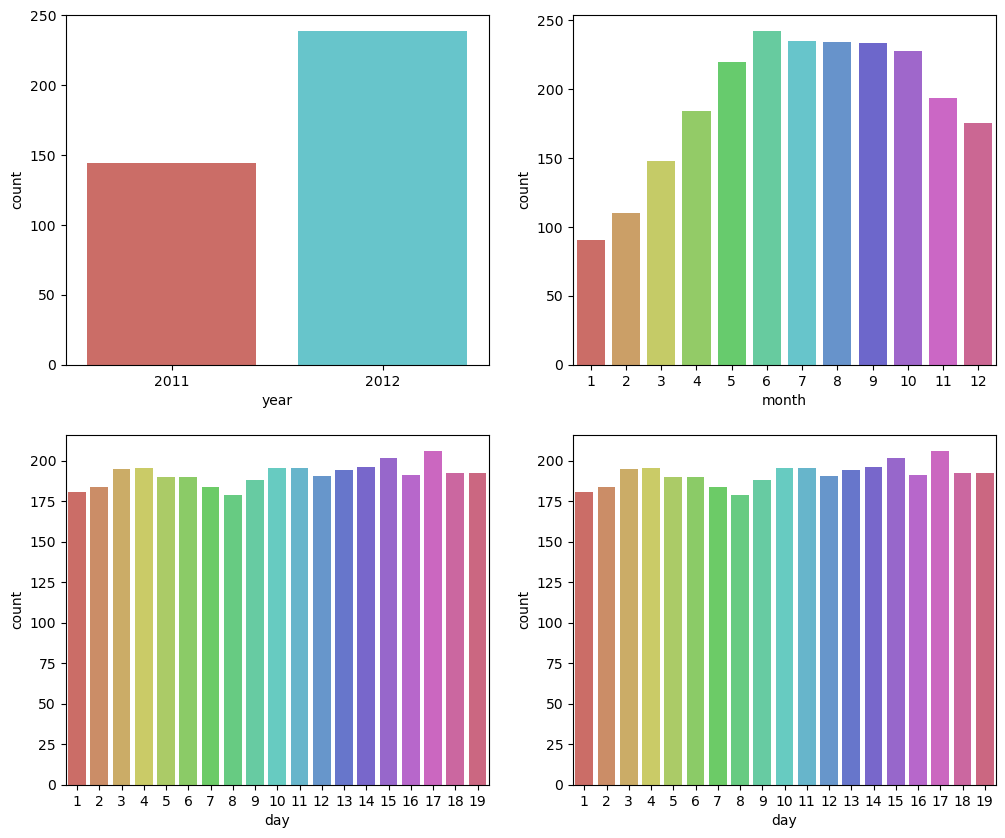

In [19]:
# 각각의 속성과 예측의 결과값으로 쓰이는 count값과의 관계 파악
hls_palette = 'hls'
# 연도('year')와 'count'
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='year', y='count', data = train.groupby('year')['count'].mean().reset_index(), palette=hls_palette)

# 월('month')와 'count'
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='month', y='count', data = train.groupby('month')['count'].mean().reset_index(), palette=hls_palette)

# 일('day')과 'count'
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='day', y='count', data = train.groupby('day')['count'].mean().reset_index(), palette=hls_palette)

# 시간('hour')과 'count'
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='day', y='count', data = train.groupby('day')['count'].mean().reset_index(), palette=hls_palette)